<a href="https://colab.research.google.com/github/audachang/ML_collections/blob/main/predict_attr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted value for the ./drive/MyDrive/mycolab/data/face_examples/attr_nohair.jpg:  2.901


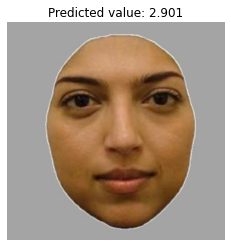

Predicted value for the ./drive/MyDrive/mycolab/data/face_examples/attr.jpg:  3.073


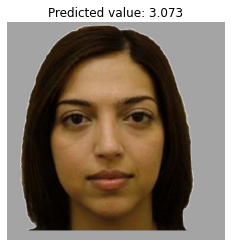

Predicted value for the ./drive/MyDrive/mycolab/data/face_examples/not_attr_nohair.jpg:  2.355


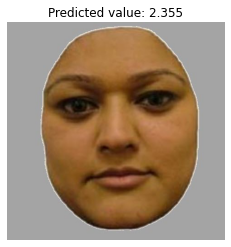

Predicted value for the ./drive/MyDrive/mycolab/data/face_examples/not_attr.jpg:  2.924


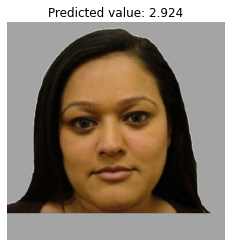

In [3]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms  # Transformations we can perform on our dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


IMAGE_SIZE = (400,400)

image_fns = ['attr_nohair.jpg','attr.jpg','not_attr_nohair.jpg','not_attr.jpg']
model_path = "./drive/MyDrive/mycolab/model/"
model_name = "model_googlenet_size480-Fold5-Epoch5"



def predict_face_value(image_path, model_path, model_name):
    # Define GoogleNet Regressor
    class GoogleNetRegressor(nn.Module):
        def __init__(self):
            super(GoogleNetRegressor, self).__init__()
            self.googlenet = models.googlenet(weights='DEFAULT')
            self.googlenet.fc = nn.Linear(in_features=1024, out_features=1)

        def forward(self, x):
            x = self.googlenet(x)
            return x

    # Load the trained model
    model = GoogleNetRegressor()
    model.load_state_dict(
        torch.load(os.path.join(model_path, f"{model_name}.pth"))['model_state_dict'])
    model.eval()

    # Define image transformation
    data_transform = transforms.Compose([
        transforms.Resize(size=IMAGE_SIZE),
        transforms.CenterCrop(IMAGE_SIZE),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ])

    # Load and preprocess the input image
    image = Image.open(image_path)
    image = data_transform(image)
    image = image.unsqueeze(0)  # Add a batch dimension

    # Make a prediction
    with torch.no_grad():
        output = model(image)

    return output.item()

def display_image_with_prediction(image_path, predicted_value):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Predicted value: {predicted_value:.3f}")
    plt.axis('off')
    plt.show()

for i in range(len(image_fns)):
    image_path = f"./drive/MyDrive/mycolab/data/face_examples/{image_fns[i]}"
    predicted_value = predict_face_value(image_path, model_path, model_name)
    #print(f"Predicted value for the {image_path}:  {predicted_value:.3f}")
    display_image_with_prediction(image_path, predicted_value)


